In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
category_tree = pd.read_csv('../Datasets/category_tree.csv')
events = pd.read_csv('../Datasets/events.csv')
item_properties_part1 = pd.read_csv('../Datasets/item_properties_part1.csv')

In [53]:
category_tree

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


In [50]:
events

,timestamp,visitorid,event,itemid,transactionid,dia_da_semana,mes,hora,quantidade_vendida
0,1970-01-01 00:23:53.221332117,257597,view,355908,NaN,3,1,0,1
1,1970-01-01 00:23:53.224214164,992329,view,248676,NaN,3,1,0,1
2,1970-01-01 00:23:53.221999827,111016,view,318965,NaN,3,1,0,1
3,1970-01-01 00:23:53.221955914,483717,view,253185,NaN,3,1,0,1
4,1970-01-01 00:23:53.221337106,951259,view,367447,NaN,3,1,0,1
...,...,...,...,...,...,...,...,...,...
2756096,1970-01-01 00:23:58.398785939,591435,view,261427,NaN,3,1,0,1
2756097,1970-01-01 00:23:58.399813142,762376,view,115946,NaN,3,1,0,1
2756098,1970-01-01 00:23:58.397820527,1251746,view,78144,NaN,3,1,0,1
2756099,1970-01-01 00:23:58.398530703,1184451,view,283392,NaN,3,1,0,1


In [54]:
item_properties_part1

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
...,...,...,...,...
10999994,1439694000000,86599,categoryid,618
10999995,1435460400000,153032,1066,n1020.000 424566
10999996,1440298800000,421788,888,35975 856003 37346
10999997,1437879600000,159792,400,n552.000 639502 n720.000 424566


In [13]:
category_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


In [14]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [15]:
item_properties_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB


In [16]:
category_tree.isnull().sum()

categoryid     0
parentid      25
dtype: int64

In [17]:
events.isnull().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

In [18]:
item_properties_part1.isnull().sum()

timestamp    0
itemid       0
property     0
value        0
dtype: int64

In [19]:
category_tree_clean = category_tree.dropna().drop_duplicates()
events_clean = events.dropna().drop_duplicates()
item_properties_part1_clean = item_properties_part1.dropna().drop_duplicates()

In [20]:
category_tree_clean.isnull().sum()

categoryid    0
parentid      0
dtype: int64

In [25]:
events_clean.isnull().sum()

timestamp        0
visitorid        0
event            0
itemid           0
transactionid    0
dtype: int64

In [26]:
events_clean.columns

Index(['timestamp', 'visitorid', 'event', 'itemid', 'transactionid'], dtype='object')

In [37]:
events['timestamp'] = pd.to_datetime(events['timestamp'])
events['dia_da_semana'] = events['timestamp'].dt.dayofweek  
events['mes'] = events['timestamp'].dt.month
events['hora'] = events['timestamp'].dt.hour  

In [38]:
events['quantidade_vendida'] = 1

In [39]:
df_agregado = events.groupby(['itemid', 'dia_da_semana', 'mes']).agg({'quantidade_vendida': 'sum'}).reset_index()

In [40]:

X = df_agregado.drop('quantidade_vendida', axis=1)  
y = df_agregado['quantidade_vendida']  

In [42]:
X = pd.get_dummies(X, columns=['itemid'], drop_first=True) 

MemoryError: Unable to allocate 51.5 GiB for an array with shape (235061, 235061) and data type bool

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [45]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [46]:
print("Avaliação - Regressão Linear:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}")

Avaliação - Regressão Linear:
MAE: 13.661578567180397
RMSE: 36.65911246693616


C:\Users\dtiDigital\Documents\faculdade\SmartRetail\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
print("\nAvaliação - Random Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False)}")


Avaliação - Random Forest:
MAE: 15.98498092712602
RMSE: 44.81263983104743


C:\Users\dtiDigital\Documents\faculdade\SmartRetail\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [48]:
# Visualizando a comparação entre os modelos
mae_comparison = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Random Forest'],
    'MAE': [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_rf)]
})


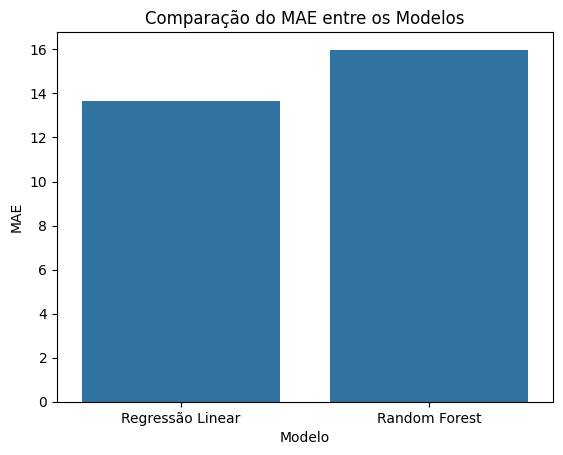

In [49]:
sns.barplot(x='Modelo', y='MAE', data=mae_comparison)
plt.title('Comparação do MAE entre os Modelos')
plt.show()

In [51]:
df_agregado 

,itemid,dia_da_semana,mes,quantidade_vendida
0,3,3,1,2
1,4,3,1,3
2,6,3,1,29
3,9,3,1,2
4,15,3,1,22
...,...,...,...,...
235056,466861,3,1,95
235057,466862,3,1,4
235058,466863,3,1,1
235059,466864,3,1,91
